# Chapter 6 - Exercise 5
### Author: *John Benedick Estrada*
---
**Exercise:** If you generalize the Turing machine to two dimensions, or add a read-write head to a 2-D CA, the result is a cellular automaton called a Turmite. It is named after a termite because of the way the read-write head moves, but spelled wrong as an homage to Alan Turing. The most famous Turmite is Langton’s Ant, discovered by Chris Langton in 1986. See http://thinkcomplex.com/langton.

The ant is a read-write head with four states, which you can think of as facing north, south, east or west. The cells have two states, black and white. The rules are simple. During each time step, the ant checks the color of the cell it is on. If black, the ant turns to the right, changes the cell to white, and moves forward one space. If the cell is white, the ant turns left, changes the cell to black, and moves forward.

Given a simple world, a simple set of rules, and only one moving part, you might expect to see simple behavior — but you should know better by now. Starting with all white cells, Langton’s ant moves in a seemingly random pattern for more than 10,000 steps before it enters a cycle with a period of 104 steps. After each cycle, the ant is translated diagonally, so it leaves a trail called the “highway”.

Write an implementation of Langton’s Ant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from utils import underride

from scipy.signal import correlate2d

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Cell2D import Cell2D
from scipy.signal import correlate2d
from utils import underride

##### Implementation of Langton's Ant

In [3]:
class LangtonsAnt(Cell2D):
    # Direction: up, right, down, left
    # The direction array goes clockwise.
    DIRECTIONS = \
        [(-1, 0), (0, 1), (1, 0), (0, -1)]

    def __init__(self, n, m=None, x_pos=None, y_pos=None):
        super().__init__(n, m)
        
        self.n = n
        self.m = m
        self.y_pos = n//2
        self.x_pos = m//2 if m is not None else self.y_pos
        if x_pos:
            self.x_pos = x_pos
        if y_pos:
            self.y_pos = y_pos
            
        self.dir_idx = 0   # Index for `self.DIRECTION`.
    
    def step(self):
        # Flip the state of the current cell.
        curr_cell = self.array[self.x_pos, self.y_pos]
        self.array[self.x_pos, self.y_pos] = ~curr_cell & 1
    
        # Rotate the ant according to state of the current cell.
        if curr_cell == 0:
            # Rotate the ant clockwise.
            self.dir_idx = (self.dir_idx + 1) % 4
        else:
            # Rotate the ant counter-clockwise.
            # NOTE: This is complement addition.
            self.dir_idx = (self.dir_idx + 3) % 4


        # Advance the ant.
        drxn = self.DIRECTIONS[self.dir_idx]
        self.x_pos = (self.x_pos + drxn[0]) % self.m
        self.y_pos = (self.y_pos + drxn[1]) % self.n
    
    def draw(self, **options):
        n, m = self.array.shape
        options = underride(options,
                            cmap='Greens',
                            alpha=0.7,
                            vmin=0, vmax=1, 
                            interpolation='none', 
                            origin='upper',
                            extent=[0, m, 0, n])
        
        plt.imshow(self.array, **options)
        ax = plt.gca()

        plt.axis([0, m, 0, n])
        plt.xticks([])
        plt.yticks([])

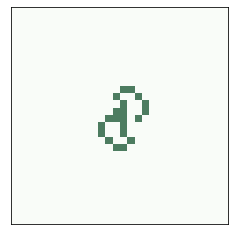

In [4]:
ant = LangtonsAnt(30, 30)
ant.animate(100, 0)